**1. Integração numérica**

Na aproximação da integral

\begin{align*}
\int_{a}^{b} f(x) ~dx,
\end{align*}

dividimos o intervalo $[a,b]$ em $n$ partes de mesmo tamanho $h$. Deste modo, o nó inicial é $x_0 = a$ e o nó final é $x_n = b$. Logo,

\begin{align*}
h = \dfrac{b-a}{n} = \dfrac{x_n-x_0}{n}.
\end{align*}

Aqui, estudamos basicamente duas regras:


**1.1. Regra dos Trapézios repetida**

\begin{align*}
\int_{a = x_0}^{b = x_n} f(x) ~dx \approx \int_{x_0}^{x_1} P_1(x) ~dx + \int_{x_1}^{x_2} P_1(x) ~dx + \ldots \int_{x_{n-1}}^{x_n} P_1(x) ~dx
= \sum_{k = 1}^n \int_{x_{k-1}}^{x_k} P_1(x) ~dx
\end{align*}

onde $P_1(x)$ é um polinômio de grau $1$ que interpola $f(x)$ nos nós $x_{k-1}$ e $x_k$ para todo $k = 1,2, \ldots, n$, definido na Forma de Lagrange por:

\begin{align*}
P_1(x) = L_{k-1}(x) f(x_{k-1}) + L_k(x) f(x_k),
\end{align*}

onde

\begin{align*}
L_{k-1}(x) = \dfrac{x-x_k}{x_{k-1} - x_k}; ~ L_k(x) = \dfrac{x-x_{k-1}}{x_k - x_{k-1}}.
\end{align*}

No desenvolvimento das parcelas do lado direito da integral acima, encontramos:

\begin{align*}
\int_{a = x_0}^{b = x_n} f(x) ~dx \approx \dfrac{h}{2} [ f(x_0) + {\color{blue} 2 f(x_1) + 2 f(x_2)) + \ldots + 2 f(x_{n-1}) } + f(x_n) ].
\end{align*}

**1.2. Regra (1/3) de Simpson**

\begin{align*}
\int_{a = x_0}^{b = x_n} f(x) ~dx \approx \int_{x_0}^{x_2} P_2(x) ~dx + \int_{x_2}^{x_4} P_2(x) ~dx + \ldots \int_{x_{n-2}}^{x_n} P_2(x) ~dx
= \sum_{k = 2}^n \int_{x_{k-2}}^{x_k} P_2(x) ~dx
\end{align*}

onde $P_2(x)$ é um polinômio de grau $2$ que interpola $f(x)$ nos nós $x_{k-2}$ e $x_k$ para todo $k = 2,3, \ldots, n$, definido na Forma de Lagrange por:

\begin{align*}
P_2(x) = L_{k-2}(x) f(x_{k-2}) + L_{k-1}(x) f(x_{k-1}) + L_k(x) f(x_k),
\end{align*}

onde

\begin{align*}
L_{k-2}(x) = \dfrac{(x-x_{k-1})(x - x_k)}{(x_{k-2}-x_{k-1})(x_{k-2} - x_k)}; ~ L_{k-1}(x) = \dfrac{(x-x_{k-2})(x - x_k)}{(x_{k-1}-x_{k-2})(x_{k-1} - x_k)};
~ L_k(x) = \dfrac{(x-x_{k-2})(x - x_{k-1})}{(x_k-x_{k-2})(x_k - x_{k-1})}.
\end{align*}

No desenvolvimento das parcelas do lado direito da integral acima, encontramos:

\begin{align*}
\int_{a = x_0}^{b = x_n} f(x) ~dx \approx \dfrac{h}{2} ( f(x_0) + {\color{blue} 4 [ f(x_1) + f(x_3) + \ldots f(x_{n-1}) ] } + {\color{green}  2 [ f(x_2) + f(x_4) + \ldots + f(x_{n-2}) ] } + f(x_n) ).
\end{align*}

In [1]:
# Importar a biblioteca numpy,  
# biblioteca permite trabalhar com a manipulação de objetos array multidimensionais, 
# além de seus objetos derivados, como matrizes, sequências, e outros.
# A função exp(x) pertence a esta biblioteca.
import numpy as np

# Importar a biblioteca math para definição das constantes matemáticas (Pi, por exemplo):
import math


# Define a função a ser integrada: 
def f(x):
        return np.exp(x)  # Exemplo: e^x  ## intervalo: [a,b] = [0,1]
        # return 1/(np.sqrt(2 + x**3))  ## intervalo: [a,b] = [0,1]
        # return np.exp(-x**2) ## intervalo: [a,b] = [1,2]
        # return x**2  # Exemplo: x²  ## intervalo: [a,b] = [0,1]
        # return np.exp(2 * x) * np.sin(3 * x) ## intervalo: [a,b] = [0,2]

# Define o polinômio de grau 1 para a Regra dos Trapézios repetida:
def P_1(x,x_i,x_j):
     return ((x - x_j)/(x_i - x_j))*f(x_i) + ((x - x_i)/(x_j - x_i))*f(x_j)

# Define o polinômio de grau 2 para a Regra (1/3) de Simpson repetida:
def P_2(x,x_i,x_j,x_k):
     return ((x - x_j) * (x - x_k))/((x_i - x_j) * (x_i - x_k))*f(x_i) \
            + ((x - x_i) * (x - x_k))/((x_j - x_i) * (x_j - x_k))*f(x_j) \
            + ((x - x_i) * (x - x_j))/((x_k - x_i) * (x_k - x_j))*f(x_k) 


# Função para a Regra dos Trapézios repetida, que recebe como argumentos de entrada:
# n: número de subintervalos de mesmo tamanho h do intervalo [a, b];
# a: valor inicial do intervalo;
# b: valor final do intervalo.
def Integral_Trapezios(n_T,a,b):

    ## Gera n pontos igualmente espaçados no intervalo [x_0,x_n]
    ## com tamanho h para cada subintervalo
    x_ap = np.linspace(a, b, n_T+1) 

    soma_funcoes = 0
    for k in range(0,n_T+1):
        if k == 0 or k == n_T:
            soma_funcoes = soma_funcoes + f(x_ap[k])
        else:
            soma_funcoes = soma_funcoes + 2 * f(x_ap[k])

    int_Trapezios = (h_T/2) * soma_funcoes
    
    return int_Trapezios 


# Função para a Regra (1/3) de Simpson repetida, que recebe como argumentos de entrada:
# n: número de subintervalos de mesmo tamanho h do intervalo [a, b];
# a: valor inicial do intervalo;
# b: valor final do intervalo.
def Integral_Simpson(n_S,x_0,x_n):
     
    if n_S % 2 != 0:
        ### Se n_S for par, a execução do programa é interrompida
        exit()

    ## Gera n pontos igualmente espaçados no intervalo [x_0,x_n]
    ## com tamanho h para cada subintervalo
    x_ap = np.linspace(x_0, x_n, n_S+1) 

    soma_funcoes = 0
    for k in range(0,n_S+1):
        if k == 0 or k == n_S:
            soma_funcoes = soma_funcoes + f(x_ap[k])
        elif k % 2 == 1:
            soma_funcoes = soma_funcoes + 4 * f(x_ap[k])
        else:
            soma_funcoes = soma_funcoes + 2 * f(x_ap[k])

    int_Simpson = (h_S/3) * soma_funcoes
    
    return int_Simpson


# Define o intervalo de integração (opcional, se quiser calcular o valor):
a = 0  # Limite inferior
b = 1  # Limite superior

# Numero de intervalos:
n_T = 20
n_S = 20

### Simpson - Resultados só serão exibidos se n_S for par:
if n_S % 2 != 0:
        print('\n\n')
        print('Erro! Na Regra (1/3) de Simpson, n deve ser par!!!')

# Passo h:
h_T = (b - a)/n_T
h_S = (b - a)/n_S


**2. Solução analítica**

A solução analítica é dada pelo Teorema Fundamental do Cálculo,

\begin{align*}
\int_a^b f(x) ~dx = F(b) - F(a),
\end{align*}

onde $F$ é a primitiva (ou antiderivada) de $f$.

In [5]:
# Biblioteca scipy para importar a função quad que calcula a solução analítica da integral
# com excelente precisão.
from scipy.integrate import quad

# Função que calcula a função primitiva de f(x) em x.
# def anti_derivada(a,x):
#         # A função quad da biblioteca scipy retorna como saídas:
#         # integral: O cálculo da integral de a até x. 
#         # err: o erro do cálculo da integral
#         # Obs.: O símbolo "_" é para omitir a variável de erro "err" da integral 
#         integral, _ = quad(f, a, x)  
#         return integral


# Criar pontos para plotar a função original:
x = np.linspace(a, b, 100) # 100 pontos entre 0 e 3
y = f(x)

# Calcula a primitiva em cada ponto x
# y_primitiva = [anti_derivada(a,xi) for xi in x] 

# 3. Calcule a integral (opcional, se quiser o valor): 
integral_valor, _ = quad(f, a, b) # integral_valor é o valor numérico da integral

**3. Exemplo**

Considere a integral definida

\begin{align*}
\int_0^1 e^x ~dx
\end{align*}

Estime o valor da integral usando as regras dos Trapézios e (1/3) de Simpson repetidas com $n = 10$ subintervalos.

In [10]:
print('\n\n')
print('-------------------------------------------------------------')
print('RESULTADOS:')
print('-------------------------------------------------------------')
print('\n')
print('Solução analítica: ', integral_valor)
print('\n\n')
int_Trapezios = Integral_Trapezios(n_T,a,b)
print('Trapézios: ', int_Trapezios)
print('\n\n')
if n_S % 2 == 0:
        ### Se n_S for par, os resultados de Simpson são exibidos:
        int_Simpson = Integral_Simpson(n_S,a,b)
        print('(1/3) Simpson: ', int_Simpson)
        print('\n\n')
else:
        print('Erro! Na Regra (1/3) de Simpson, n deve ser par!!!')

### Exibição dos erros absolutos:
print('-------------------------------------------------------------')
print('ERROS ABSOLUTOS:')
print('-------------------------------------------------------------')
print('\n')
Erro_Trapezios = np.abs(integral_valor - int_Trapezios)
print('Erro Trapézios:', Erro_Trapezios)
print('\n')
if n_S % 2 == 0:
        ### Se n_S for par, os resultados de Simpson são exibidos:
        Erro_Simpson = np.abs(integral_valor - int_Simpson)
        print('Erro Simpson:', Erro_Simpson)
print('\n')
        




-------------------------------------------------------------
RESULTADOS:
-------------------------------------------------------------


Solução analítica:  1.7182818284590453



Trapézios:  1.7186397889252214



(1/3) Simpson:  1.7182818881038568



-------------------------------------------------------------
ERROS ABSOLUTOS:
-------------------------------------------------------------


Erro Trapézios: 0.00035796046617608823


Erro Simpson: 5.964481153419854e-08




**4. Plotagem dos gráficos**

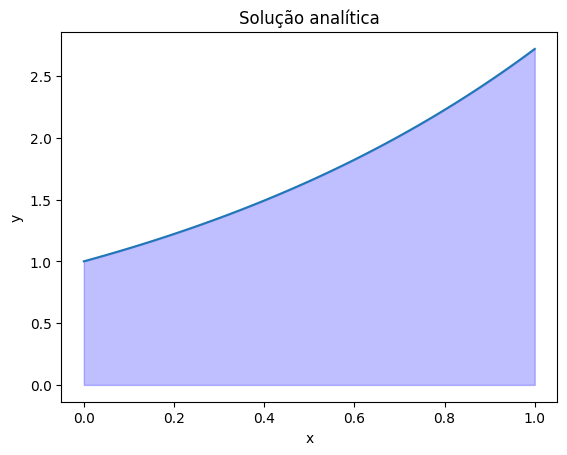

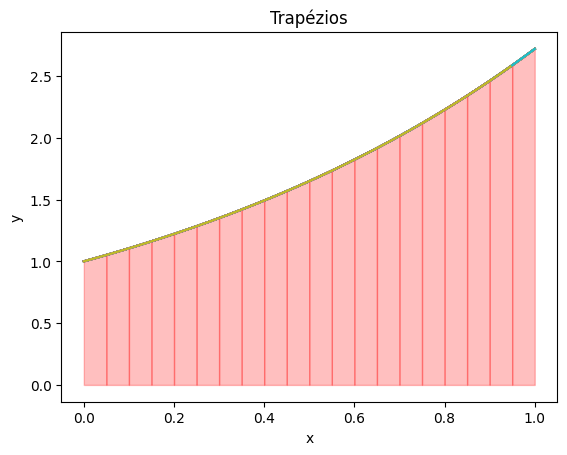

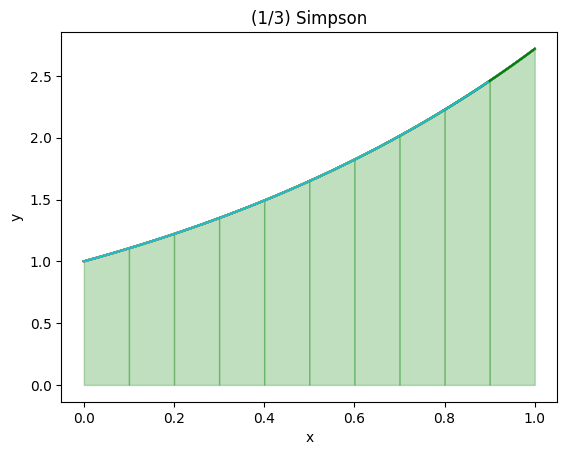

In [12]:
# Importar a biblioteca matplotlib.pyplot para exibição dos gráficos:
import matplotlib.pyplot as plt


## Plotagem do gráfico da integral analítica na janela 1:
plt.figure(1)

#  Plotar o gráfico da função f(x):
plt.plot(x, y, label='Função f(x)')

# Se quiser, pode plotar a integral da solução analítica:
# plt.fill_between(x, y, where=y >= 0, alpha=0.25, color='blue', label='Área da Integral')
# plt.fill_between(x, y, where=y >= 0, alpha=0.25, color='blue')
plt.fill_between(x, y, alpha=0.25, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução analítica')
# plt.legend()
### Habilita grade no gráfico
# plt.grid(True)

### Grafico dos Trapézios:
for k in range(1,n_T+1):
     
     x_Trapezios = np.linspace(a + (k-1)*h_T, a + k*h_T, 100) # 100 pontos entre a e a + k*h_T
     y_Trapezios = P_1(x_Trapezios,a + (k-1)*h_T,a + k*h_T)
     
     ## Plotagem do gráfico da integral analítica na janela 2:
     plt.figure(2)

     ## Plotagem da função f(x):
     plt.plot(x, y, label='Função f(x)')
     ## Plotagem da função P_2(x) para cada intervalo [x_k, x_{k+1}]:
     plt.plot(x_Trapezios, y_Trapezios, label='Função P_1(x)')
    #  plt.fill_between(x_Trapezios, y_Trapezios, where=y_Trapezios >= 0, alpha=0.25, color='blue', label='Área da Integral')
    #  plt.fill_between(x_Trapezios, y_Trapezios, where=y_Trapezios >= 0, alpha=0.25, color='red')
     plt.fill_between(x_Trapezios, y_Trapezios, alpha=0.25, color='red')
     plt.xlabel('x')
     plt.ylabel('y')
     plt.title('Trapézios')
     # plt.legend()
     ### Habilita grade no gráfico
    #  plt.grid(True)

### Grafico de Simpson:
for s in range(1,n_S + 1,2):

    if n_S % 2 != 0:
        ### Se n_S for par, saio do loop for
        break
        
    x_Simpson = np.linspace(a + (s-1)*h_S, a + (s+1)*h_S, 100) # 100 pontos entre a + (s-1)*h e a + (s+1)*h
    y_Simpson = P_2(x_Simpson,a + (s-1)*h_S, a + s*h_S, a + (s+1)*h_S)

    ## Plotagem do gráfico da integral analítica na janela 3:
    plt.figure(3)
     
    ## Plotagem da função f(x):
    plt.plot(x, y, label='Função f(x)')     
    ## Plotagem da função P_2(x) para cada intervalo [x_k, x_{k+2}]:
    plt.plot(x_Simpson, y_Simpson, label='Função P_2(x)', color='green')
    #  plt.fill_between(x_Simpson, y_Simpson, where=y_Simpson >= 0, alpha=0.25, color='red', label='Área da Integral')
    # plt.fill_between(x_Simpson, y_Simpson, where=y_Simpson >= 0, alpha=0.25, color='green')
    plt.fill_between(x_Simpson, y_Simpson, alpha=0.25, color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('(1/3) Simpson')
    # plt.legend()
    ### Habilita grade no gráfico
    # plt.grid(True)


### Exibe os gráficos dentro da condição:
### Se n_S não for par, apenas os gráficos da solução analítica
### e da solução aproximada da Regra dos Trapézios serão mostrados
plt.show()
